# Coletar dados de todas as questões

In [134]:
import os
import json

# Define dictionaries to store metrics
metrics = {
    'few_sol': {
        'solutions': [],
        'clusters': [],
        'overcode_times': [],
        'overall_times': [],
        'problem_id': []
    },
    'many_sol': {
        'solutions': [],
        'clusters': [],
        'overcode_times': [],
        'overall_times': [],
        'problem_id': []
    },
    'all_sol': {
        'solutions': [],
        'clusters': [],
        'overcode_times': [],
        'overall_times': [],
        'problem_id': []
    }
}

# Define the directory path
data_dir = 'problems_data/'

# Iterate through subdirectories in problems_data
for problem_id_folder in os.listdir(data_dir):
    problem_id_path = os.path.join(data_dir, problem_id_folder)
    
    # Check if it's a directory and if it contains an 'output' folder
    if os.path.isdir(problem_id_path) and 'output' in os.listdir(problem_id_path):
        output_dir = os.path.join(problem_id_path, 'output')
        
        # Check if 'execution_times.json' exists
        execution_times_file = os.path.join(output_dir, 'execution_times.json')
        solutions_file = os.path.join(output_dir, 'solutions.json')
        if os.path.exists(execution_times_file) and os.path.exists(solutions_file):

            with open(execution_times_file, 'r') as f:
                execution_times_data = json.load(f)

            with open(solutions_file, 'r') as f:
                solutions_data = json.load(f)
                
            # Get the number of clusters
            num_clusters = len(solutions_data)
            
            # Get the values of 'overcode_time' and 'master_script_time'
            overcode_time = execution_times_data['overcode_time']
            master_script_time = execution_times_data['master_script_time']
                    
            # Calculate the number of solutions
            num_solutions = sum(item['count'] for item in solutions_data)
            
            # Determine which category to append to based on the number of solutions
            category = 'few_sol' if num_solutions <= 50 else 'many_sol'
            
            # Append metrics to the corresponding category
            metrics[category]['solutions'].append(num_solutions)
            metrics[category]['clusters'].append(num_clusters)
            metrics[category]['overcode_times'].append(overcode_time)
            metrics[category]['overall_times'].append(master_script_time)
            metrics[category]['problem_id'].append(problem_id_folder)

# Append all metrics to the 'all_sol' category
metrics['all_sol']['solutions'] = metrics['few_sol']['solutions'] + metrics['many_sol']['solutions']
metrics['all_sol']['clusters'] = metrics['few_sol']['clusters'] + metrics['many_sol']['clusters']
metrics['all_sol']['overcode_times'] = metrics['few_sol']['overcode_times'] + metrics['many_sol']['overcode_times']
metrics['all_sol']['overall_times'] = metrics['few_sol']['overall_times'] + metrics['many_sol']['overall_times']
metrics['all_sol']['problem_id'] = metrics['few_sol']['problem_id'] + metrics['many_sol']['problem_id']


## Transformar em Séries do Pandas

In [135]:
import pandas as pd

for category in metrics:
    for metric in metrics[category]:
        metrics[category][metric] = pd.Series(metrics[category][metric])

# Agregar os dados

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Questões de cada tipo

In [136]:
few_sol_count = len(metrics['few_sol']['solutions'])
many_sol_count = len(metrics['many_sol']['solutions'])
total_sol_count = len(metrics['all_sol']['solutions'])

print(f'Number of problems with few solutions: {few_sol_count}')
print(f'Number of problems with many solutions: {many_sol_count}')
print(f'Total number of problems: {total_sol_count}')

Number of problems with few solutions: 65
Number of problems with many solutions: 17
Total number of problems: 82


## Função para exibir gráficos

In [5]:
def generate_plots(box_data, xticklabels, ylabel):
    """
    Generate box and violin plots for the given data.

    Args:
        box_data (list): Data for the box and violin plots.
        xticklabels (list): Labels for the x-axis ticks.
        ylabel (str): Label for the y-axis.

    Returns:
        None
    """
    # Data for violin plot
    violin_data = [box_data]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Box plot with outliers
    axes[0].boxplot(box_data, showfliers=True)
    axes[0].set_title('Box Plot (Showing Outliers)')
    axes[0].set_xticklabels(xticklabels)
    axes[0].set_ylabel(ylabel)

    # Box plot without outliers
    axes[1].boxplot(box_data, showfliers=False)
    axes[1].set_title('Box Plot (Not Showing Outliers)')
    axes[1].set_xticklabels(xticklabels)
    axes[1].set_ylabel(ylabel)

    # Violin plot
    axes[2].violinplot(violin_data, showmedians=True)
    axes[2].set_title('Violin Plot')
    axes[2].set_xticks([1])
    axes[2].set_xticklabels(xticklabels)
    axes[2].set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

# Example usage:
# generate_plots(box_data, ['Few solutions'], 'Overcode Time')


In [47]:
def plot_triplets_box(metrics, metric_name, ylabel):
    """
    Create box plots of the same metric for each partition of data.
    Args:
        metrics (dict): Dictionary containing the metrics.
        metric_name (str): Name of the metric.
        ylabel (str): Label for the y-axis.
    Returns:
        None
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    all_sol_data = metrics['all_sol'][metric_name]
    few_sol_data = metrics['few_sol'][metric_name]
    many_sol_data = metrics['many_sol'][metric_name]

    # Box plot for all data
    axes[0].boxplot(all_sol_data, showfliers=True)
    # axes[0].set_title('Diagrama de caixa para todas as soluções')
    axes[0].set_xticklabels(["Todas as questões"])
    axes[0].set_ylabel(ylabel)

    # Box plot for few solutions data
    axes[1].boxplot(few_sol_data, showfliers=True)
    # axes[1].set_title('Diagrama de caixa para poucas soluções')
    axes[1].set_xticklabels(["Questões com poucas soluções"])
    axes[1].set_ylabel(ylabel)

    # Box plot for many solutions data
    axes[2].boxplot(many_sol_data, showfliers=True)
    # axes[2].set_title('Diagrama de caixa para muitas soluções')
    axes[2].set_xticklabels(["Questões com muitas soluções"])
    axes[2].set_ylabel(ylabel)

    # Set y-axis limits for clusters / solutions comparison
    if metric_name == 'clusters_per_solution':
        axes[0].set_ylim(0, 1.1)
        axes[1].set_ylim(0, 1.1)
        axes[2].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_triplets_box(metrics, 'overcode_times', 'Tempo de execução do Overcode (s)')

In [159]:
def plot_triplets_violin(metrics, metric_name, ylabel):
    """
    Create violin plots of the same metric for each partition of data.
    Args:
        metrics (dict): Dictionary containing the metrics.
        metric_name (str): Name of the metric.
        ylabel (str): Label for the y-axis.
    Returns:
        None
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    all_sol_data = metrics['all_sol'][metric_name]
    few_sol_data = metrics['few_sol'][metric_name]
    many_sol_data = metrics['many_sol'][metric_name]

    # Violin plot for all data
    axes[0].violinplot(all_sol_data, showmedians=True)
    # axes[0].set_title('Diagrama de violino para todas as soluções')
    axes[0].set_xlabel('Todas as questões')
    axes[0].set_ylabel(ylabel)

    # Violin plot for few solutions data
    axes[1].violinplot(few_sol_data, showmedians=True)
    # axes[1].set_title('Diagrama de violino para poucas soluções')
    axes[1].set_xlabel('Questões com poucas soluções')
    axes[1].set_ylabel(ylabel)

    # Violin plot for many solutions data
    axes[2].violinplot(many_sol_data, showmedians=True)
    # axes[2].set_title('Diagrama de violino para muitas soluções')
    axes[2].set_xlabel('Questões com muitas soluções')
    axes[2].set_ylabel(ylabel)

    # Set y-axis limits for clusters / solutions comparison
    if metric_name == 'clusters_per_solution':
        axes[0].set_ylim(0, 1.1)
        axes[1].set_ylim(0, 1.1)
        axes[2].set_ylim(0, 1.1)

    for ax in axes:
        ax.set_xticks([])
        
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_triplets_violin(metrics, 'overcode_times', 'Tempo de execução do Overcode (s)')

## Tempos de Execução

### Gráfico de Dispersão: Tempo X Número de Soluções

#### Tempo do Overcode

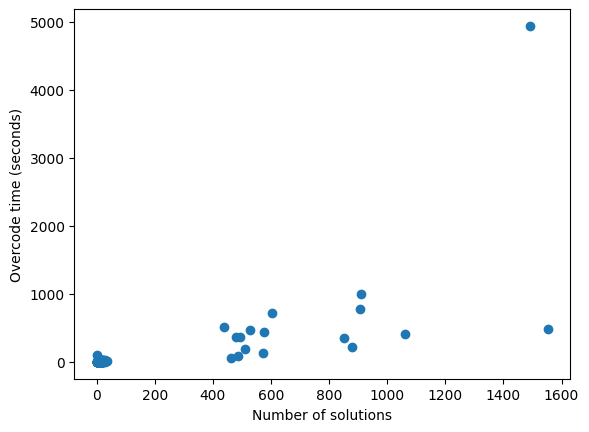

In [6]:
plt.plot(metrics['all_sol']['solutions'], metrics['all_sol']['overcode_times'], 'o')
plt.xlabel('Number of solutions')
plt.ylabel('Overcode time (seconds)')
plt.show()

#### Tempo Geral

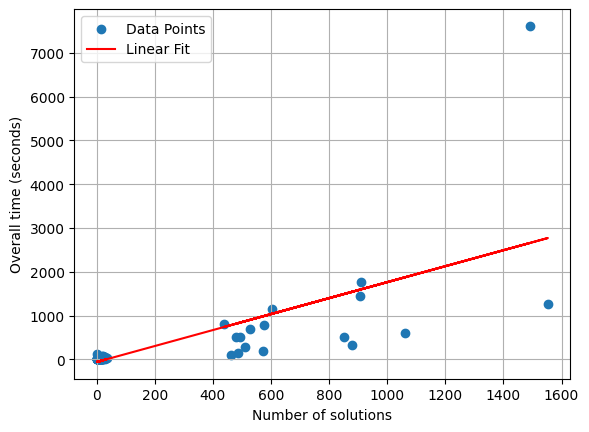

In [7]:
# Fit a linear regression line
coefficients = np.polyfit(metrics['all_sol']['solutions'], metrics['all_sol']['overall_times'], 1)
slope, intercept = coefficients

plt.scatter(metrics['all_sol']['solutions'], metrics['all_sol']['overall_times'], label='Data Points')
plt.plot(metrics['all_sol']['solutions'], slope * metrics['all_sol']['solutions'] + intercept, color='red', label='Linear Fit')

plt.xlabel('Number of solutions')
plt.ylabel('Overall time (seconds)')
plt.legend()

plt.grid(True)
plt.show()

### Tempo do Overcode para Todas as Soluções

#### Estatísticas

In [8]:
metrics['all_sol']['overcode_times'].describe()

count      82.000000
mean      145.578769
std       570.487934
min         0.104837
25%         0.741109
50%         2.356947
75%        23.778791
max      4937.495380
dtype: float64

#### Gráficos

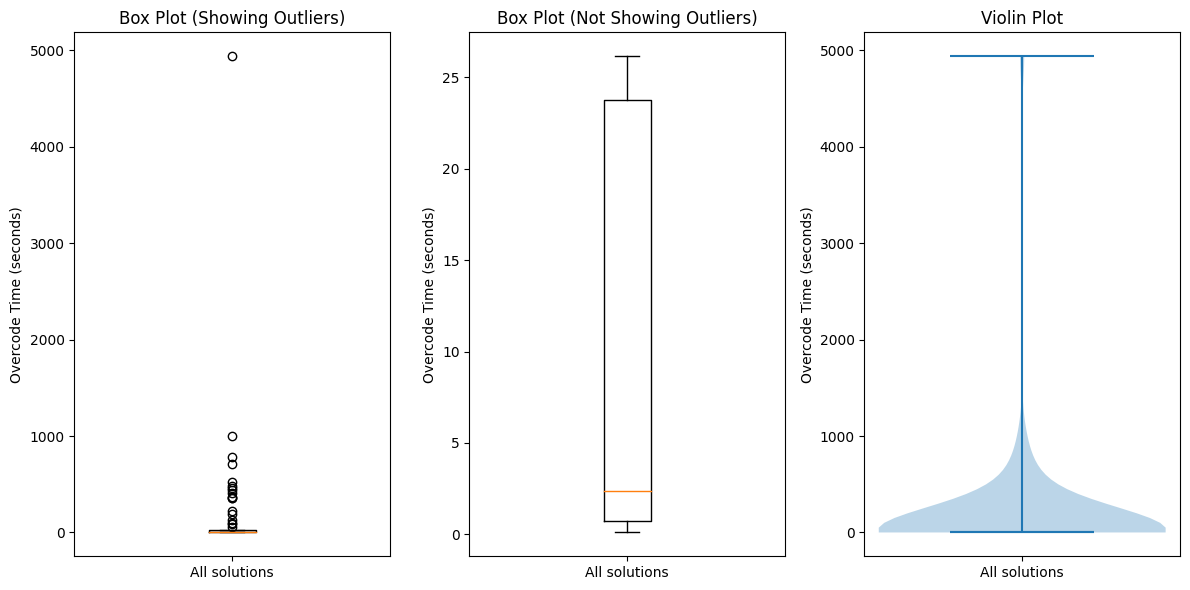

In [9]:
generate_plots(metrics['all_sol']['overcode_times'], ['All solutions'], 'Overcode Time (seconds)')

### Tempo do Overcode para Poucas Soluções

#### Estatísticas

In [10]:
metrics['few_sol']['overcode_times'].describe()

count    65.000000
mean      6.126834
std      13.623763
min       0.104837
25%       0.601782
50%       1.196087
75%       4.759479
max      98.314331
dtype: float64

#### Gráficos

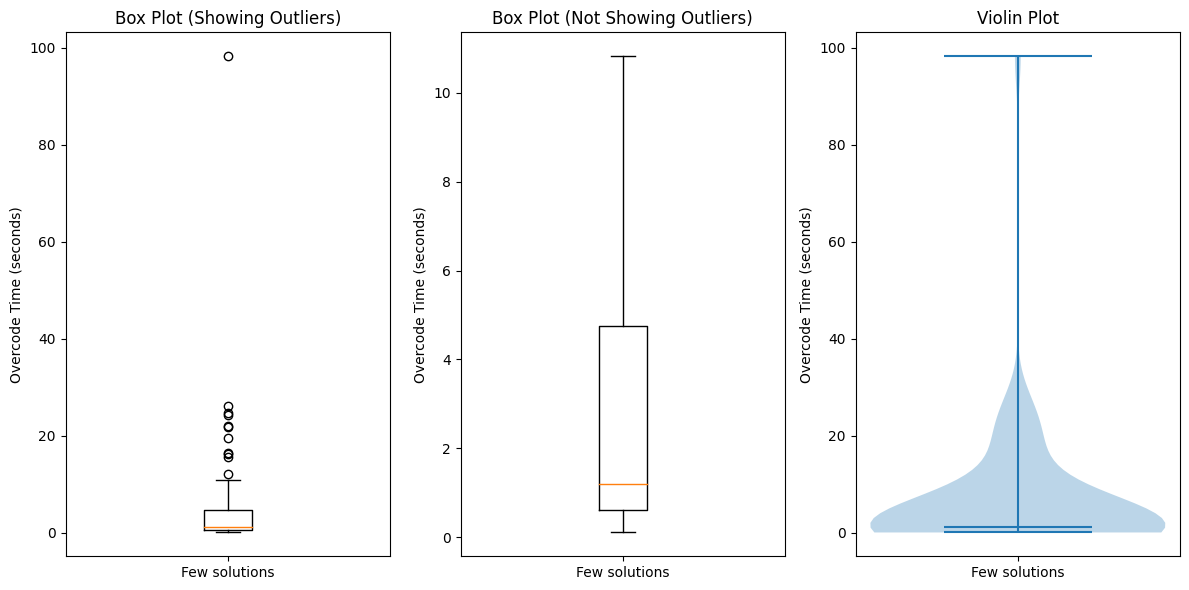

In [11]:
generate_plots(metrics['few_sol']['overcode_times'], ['Few solutions'], 'Overcode Time (seconds)')


### Tempo do Overcode para Muitas Soluções

#### Estatísticas

In [13]:
metrics['many_sol']['overcode_times'].describe()

count      17.000000
mean      678.777343
std      1125.081645
min        61.878445
25%       225.590828
50%       405.392898
75%       518.561705
max      4937.495380
dtype: float64

#### Gráficos

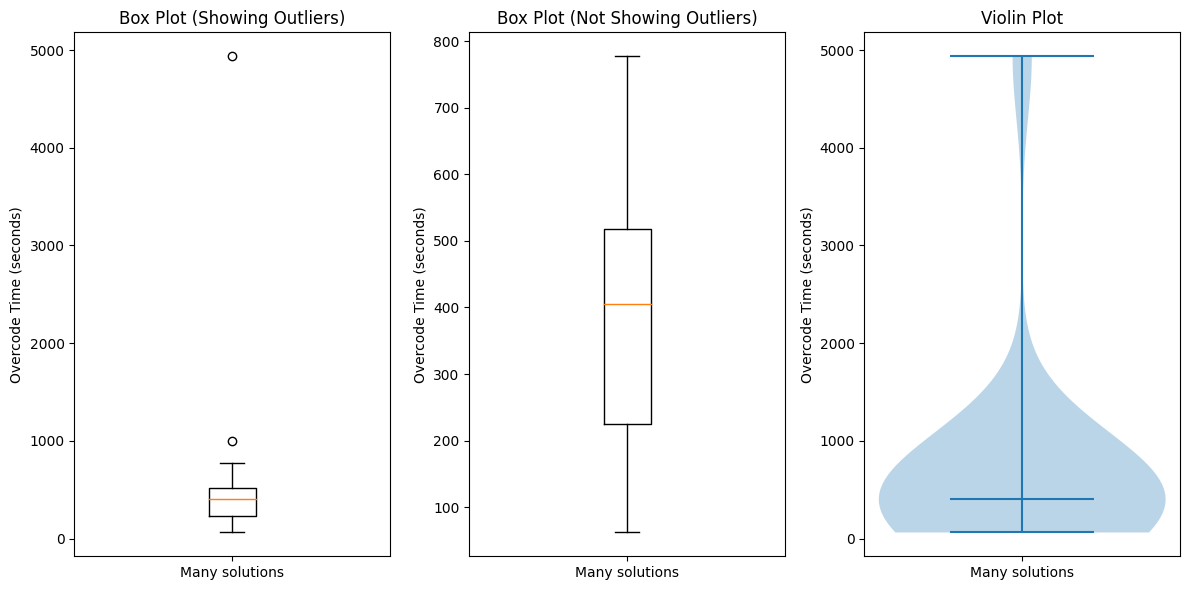

In [14]:
generate_plots(metrics['many_sol']['overcode_times'], ['Many solutions'], 'Overcode Time (seconds)')

### Tempo Geral para Todas as Soluções

#### Estatísticas

In [15]:
metrics['all_sol']['overall_times'].describe()

count      82.000000
mean      238.896284
std       892.923236
min         0.177690
25%         2.445772
50%         5.241988
75%        55.111713
max      7611.744969
dtype: float64

#### Gráficos

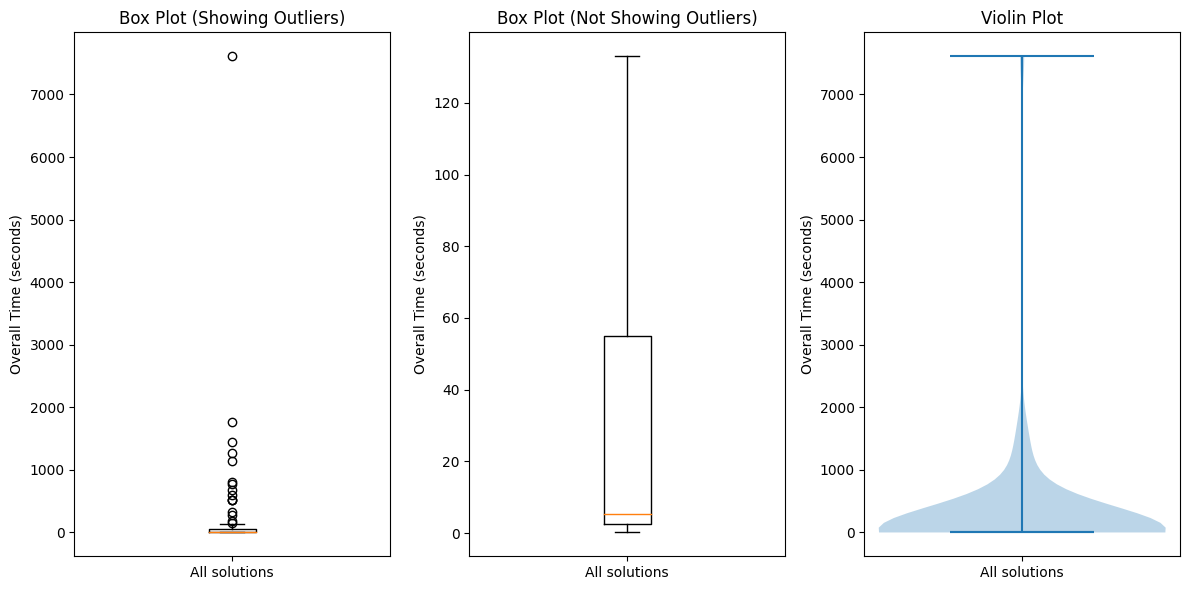

In [16]:
generate_plots(metrics['all_sol']['overall_times'], ['All solutions'], 'Overall Time (seconds)')

### Tempo Geral para Poucas Soluções

#### Estatísticas

In [17]:
metrics['few_sol']['overall_times'].describe()

count     65.000000
mean      13.978181
std       22.670586
min        0.177690
25%        2.086411
50%        3.749004
75%       14.019047
max      133.038839
dtype: float64

#### Gráficos

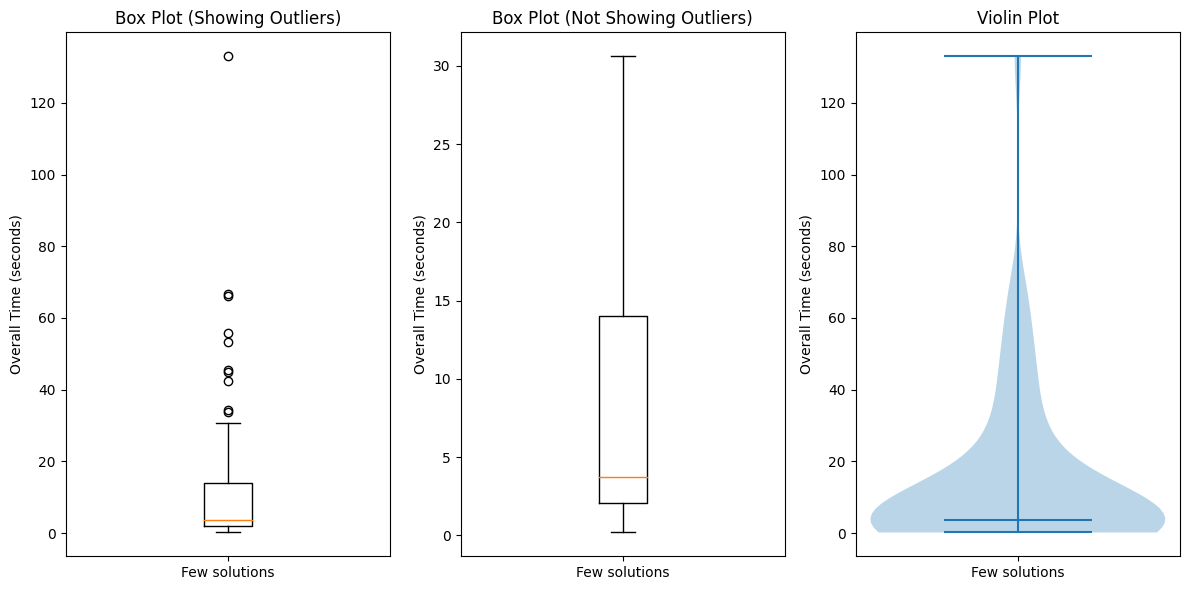

In [18]:
generate_plots(metrics['few_sol']['overall_times'], ['Few solutions'], 'Overall Time (seconds)')

### Tempo Geral para Muitas Soluções

#### Estatísticas

In [19]:
metrics['many_sol']['overall_times'].describe()

count      17.000000
mean     1098.877267
std      1744.428582
min        88.643589
25%       322.358351
50%       591.127459
75%      1146.595840
max      7611.744969
dtype: float64

#### Gráficos

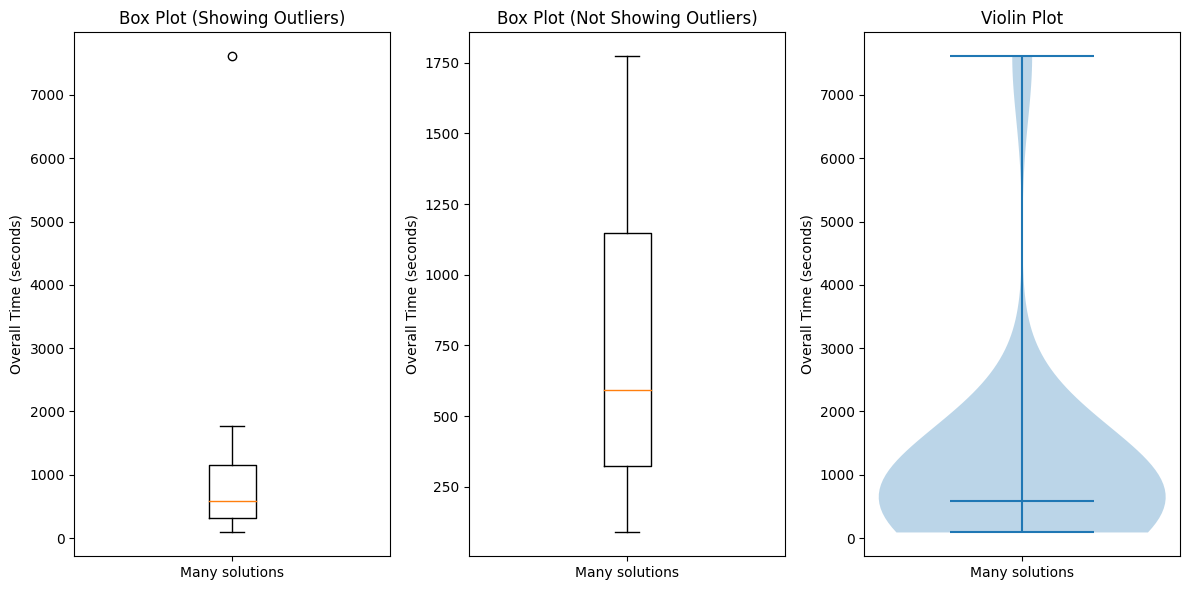

In [20]:
generate_plots(metrics['many_sol']['overall_times'], ['Many solutions'], 'Overall Time (seconds)')

## Número de Clusteres e Soluções

In [21]:
few_sol_percentages = metrics['few_sol']['clusters'] / metrics['few_sol']['solutions']
many_sol_percentages = metrics['many_sol']['clusters'] / metrics['many_sol']['solutions']
all_sol_percentages = metrics['all_sol']['clusters'] / metrics['all_sol']['solutions']

### Todas as Questões

In [22]:
print(f'Using Overcode, the number of programs is reduced to {round(all_sol_percentages.mean(), 4) * 100}% of the original number of programs (all solutions)')

Using Overcode, the number of programs is reduced to 82.35% of the original number of programs (all solutions)


#### Estatísticas

In [165]:
all_sol_percentages.describe()

count    82.000000
mean      0.823513
std       0.205455
min       0.192531
25%       0.669704
50%       0.901807
75%       1.000000
max       1.000000
dtype: float64

#### Gráficos

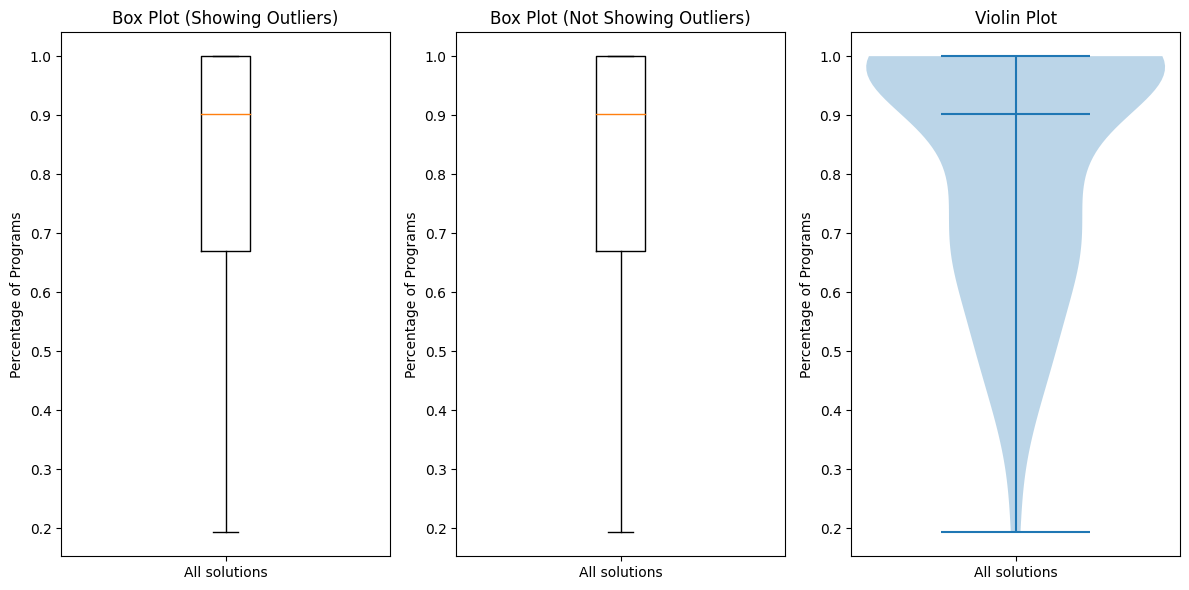

In [24]:
generate_plots(all_sol_percentages, ['All solutions'], 'Percentage of Programs')

### Questões com Poucas Soluções

In [28]:
print(f'Using Overcode, the number of programs is reduced to {round(few_sol_percentages.mean()* 100, 2) }% of the original number of programs (few solutions)')

Using Overcode, the number of programs is reduced to 87.65% of the original number of programs (few solutions)


#### Estatísticas

In [166]:
few_sol_percentages.describe()

count    65.000000
mean      0.876520
std       0.179172
min       0.333333
25%       0.818182
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

#### Gráficos

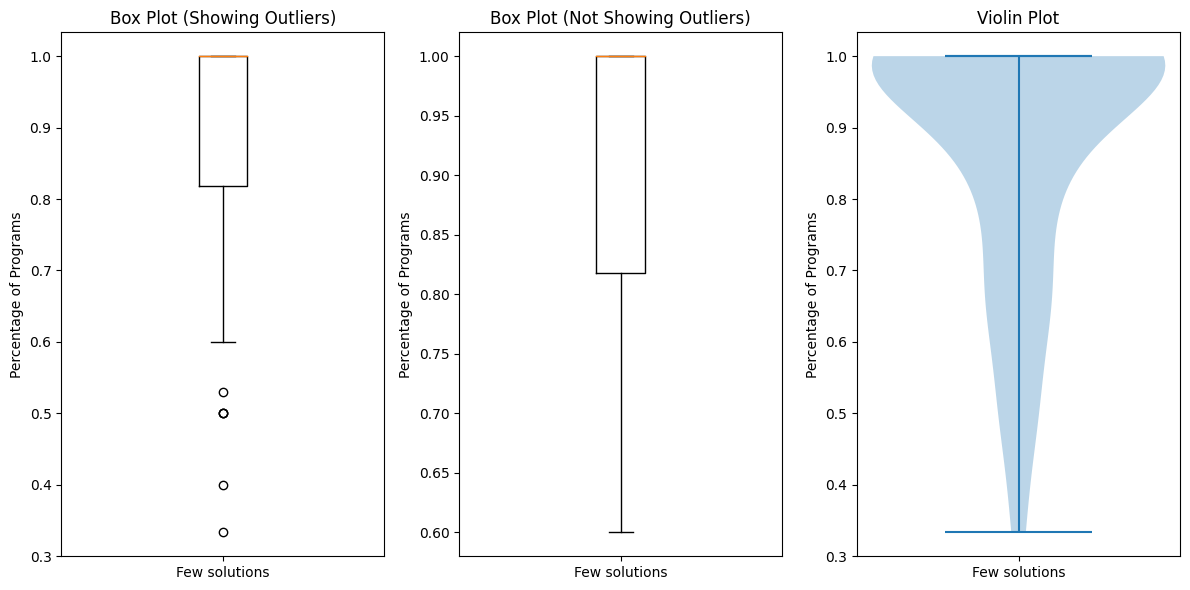

In [30]:
generate_plots(few_sol_percentages, ['Few solutions'], 'Percentage of Programs')

### Questões com Muitas Soluções

In [31]:
print(f'Using Overcode, the number of programs is reduced to {round(many_sol_percentages.mean(), 4) * 100}% of the original number of programs (many solutions)')

Using Overcode, the number of programs is reduced to 62.08% of the original number of programs (many solutions)


#### Estatísticas

In [167]:
many_sol_percentages.describe()

count    17.000000
mean      0.620838
std       0.173860
min       0.192531
25%       0.550699
50%       0.656428
75%       0.723478
max       0.894523
dtype: float64

#### Gráficos

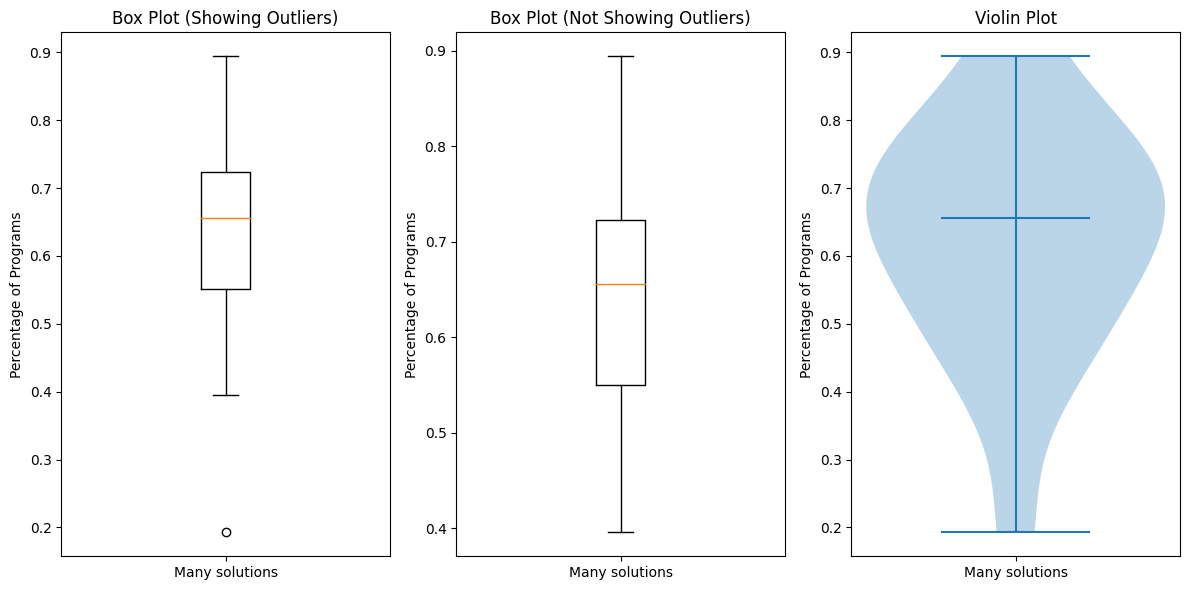

In [48]:
generate_plots(many_sol_percentages, ['Many solutions'], 'Percentage of Programs')

## Gerando trios da mesma métrica

Por sugestão da professora Laura, vamos juntar os gráficos pela métrica representada para as 3 partições de dados.

### Outliers

Outra sugestão foi a de retirar dos gráficos de tempo apenas os maiores outliers de cada gráfico, para facilitar a visualização.

Identificamos que nos gráficos para todas as questões ou para questões com muitas soluções, o maior outlier é o problema com id 734.

Já no caso do gráfico para questões com poucas soluções, o maior outlier é o problema com id X.

In [144]:
many_idmax = metrics['many_sol']['overcode_times'].idxmax()
print(many_idmax)
print(f"Outlier problem for questions with many solutions: {metrics['many_sol']['problem_id'][many_idmax]}")

14
Outlier problem for questions with many solutions: problem_734


In [143]:
all_idmax = metrics['all_sol']['overcode_times'].idxmax()
print(all_idmax)
print(f"Outlier problem for questions with many solutions: {metrics['all_sol']['problem_id'][all_idmax]}")

79
Outlier problem for questions with many solutions: problem_734


In [140]:
few_idmax = metrics['few_sol']['overcode_times'].idxmax()
print(f'Outlier problem for questions with few solutions: {metrics["few_sol"]["problem_id"][few_idmax]}')

Outlier problem for few questions: problem_784


#### Enunciado da questão 734

Questão OBI (Olimpíada Brasileira de Informática - 2012, Fase 1, Nível Júnior) - (Campeonato)

Dois times, Cormengo e Flaminthians, participam de um campeonato de futebol, juntamente com outros times. Cada vitória conta três pontos, cada empate um ponto. Fica melhor classificado no campeonato um time que tenha mais pontos. Em caso de empate no número de pontos, fica melhor classificado o time que tiver maior saldo de gols. Se o número de pontos e o saldo de gols forem os mesmos para os dois times então os dois times estão empatados no campeonato. Faça uma função definida por classificacao(Cv, Ce, Cs, Fv, Fe, Fs). Dados os números de vitórias e empates, e os saldos de gols dos dois times, sua tarefa é determinar qual dos dois está melhor classificado, ou se eles estão empatados no campeonato.

Entrada: Os parâmetros de entrada da função são seis números inteiros C, Ce, Cs, F v, F e e F s, que são, respectivamente, o número de vitórias do Cormengo, o número de empates do Cormengo, o saldo de gols do Cormengo, o número de vitórias do Flaminthians, o número de empates do Flaminthians e o saldo de gols do Flaminthians. 

Saída: A sua fun¸ção deve retornar a string 'Cormengo', se Cormengo estiver melhor classificado que Flaminthians ou a string 'Flaminthians' , se Flaminthians estiver melhor classificado que Cormengo; e se os dois times estão empatados a função deve retornar 'Empate'. 

Exemplos:
Entrada: 10,5,18,11,2,18
Saída: ’Empate’ 

Entrada: 10,5,18,11,1,18 ; 
Sapida: ’Cormengo’

Entrada: 9,5,-1,10,2,10
Saída: ’Flaminthians’

#### Enunciado da Questão 784

Faça uma função chamada **count** que dada uma frase e uma letra, conte quantas vezes aquela letra aparece na frase, **só que sem usar a função count()**.


**Atenção!**
Maiúsculas e minúsculas também contam! Mas o computador não sabe que elas são iguais, você precisa antes transformá-las!

#### Eliminando outliers

Todas as questões e questões com muitas soluções

In [145]:
metrics['many_sol']['overcode_times'] = metrics['many_sol']['overcode_times'].drop(many_idmax)
metrics['many_sol']['overall_times'] = metrics['many_sol']['overall_times'].drop(many_idmax)

metrics['all_sol']['overcode_times'] = metrics['all_sol']['overcode_times'].drop(all_idmax)
metrics['all_sol']['overall_times'] = metrics['all_sol']['overall_times'].drop(all_idmax)

metrics['few_sol']['overcode_times'] = metrics['few_sol']['overcode_times'].drop(few_idmax)
metrics['few_sol']['overall_times'] = metrics['few_sol']['overall_times'].drop(few_idmax)

### Tempo de Execução do Overcode

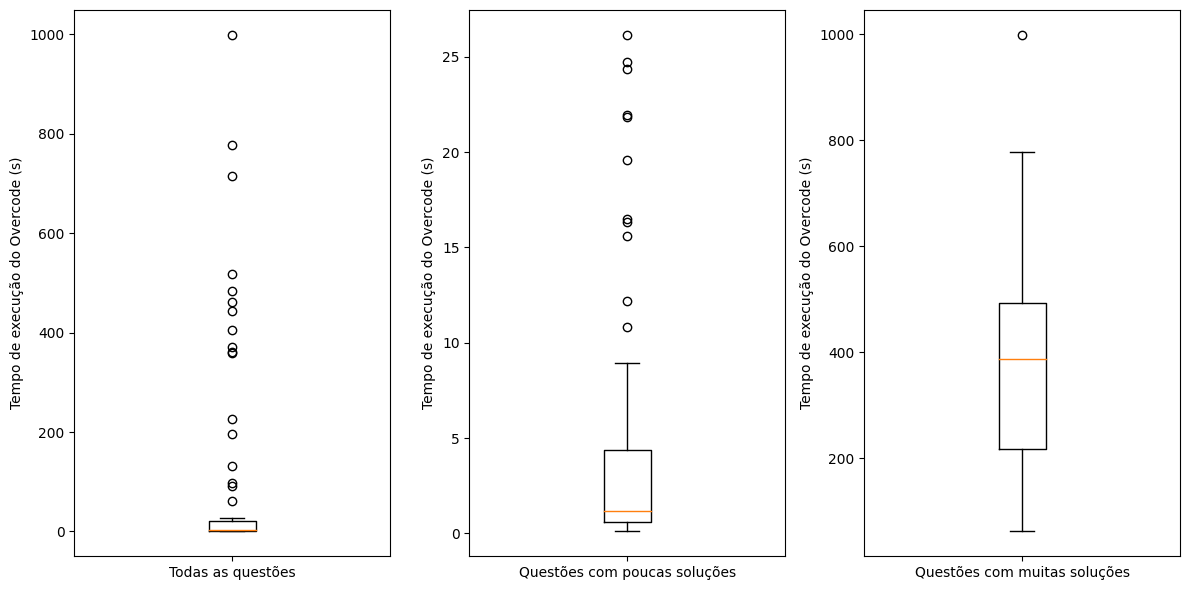

In [146]:
plot_triplets_box(metrics, 'overcode_times', 'Tempo de execução do Overcode (s)')

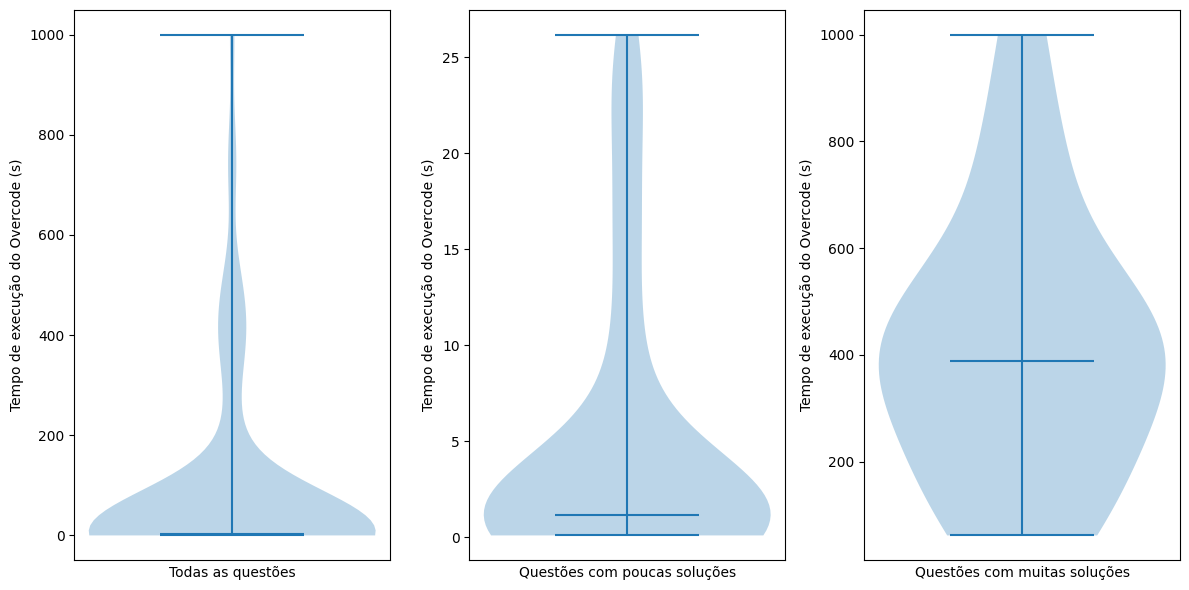

In [160]:
plot_triplets_violin(metrics, 'overcode_times', 'Tempo de execução do Overcode (s)')

### Tempo Geral

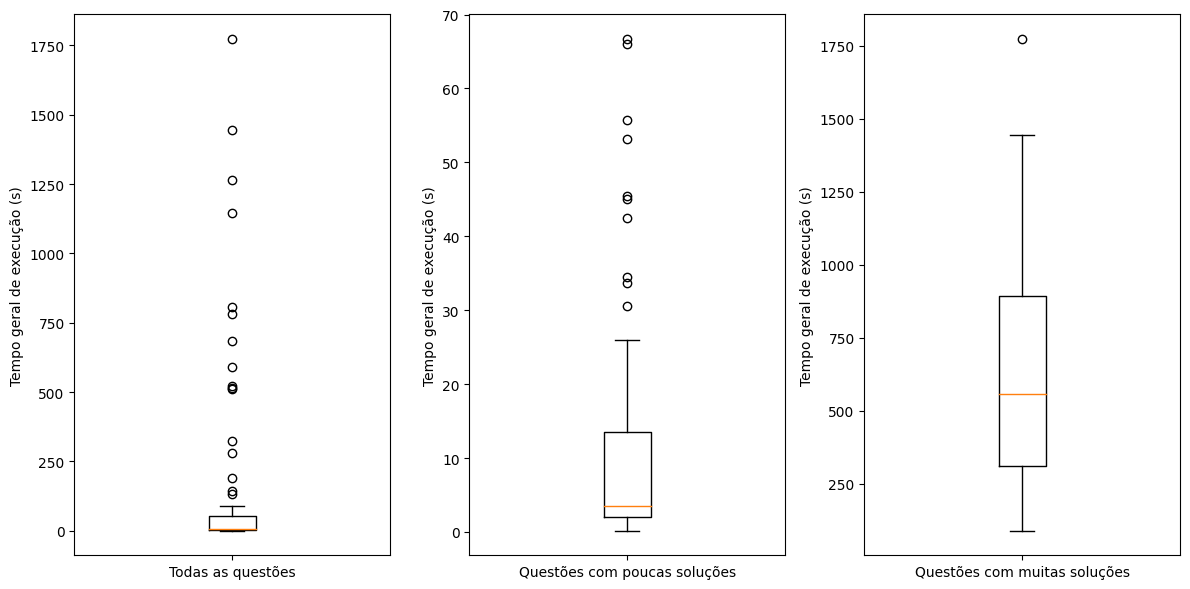

In [147]:
plot_triplets_box(metrics, 'overall_times', 'Tempo geral de execução (s)')

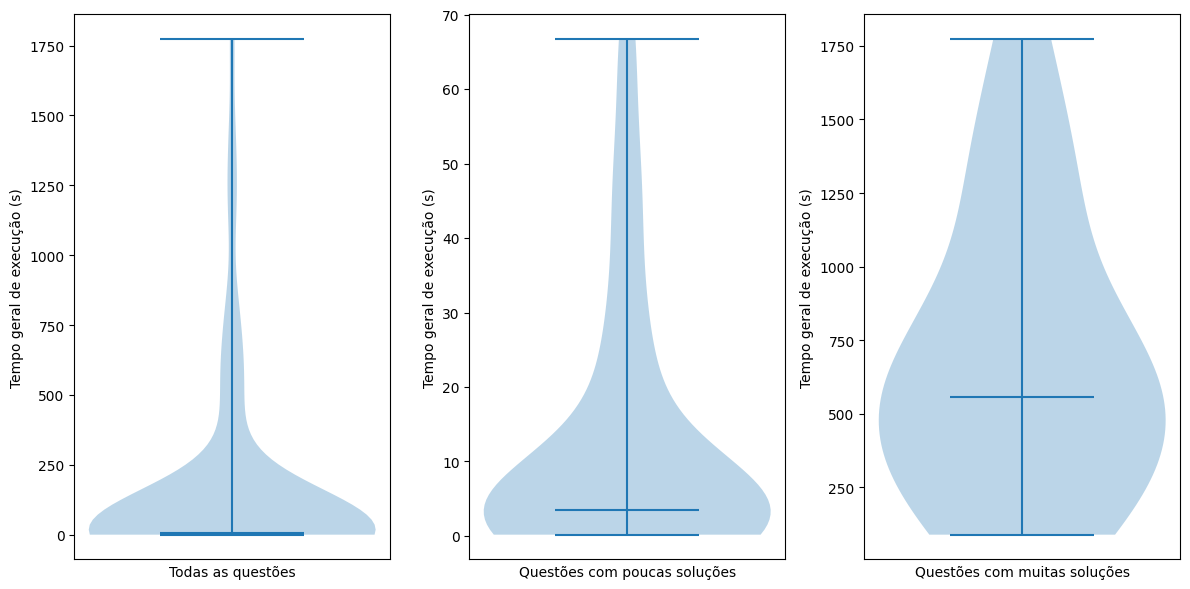

In [161]:
plot_triplets_violin(metrics, 'overall_times', 'Tempo geral de execução (s)')

### Clusters / Soluções

In [163]:
metrics['few_sol']['clusters_per_solution'] = metrics['few_sol']['clusters'] / metrics['few_sol']['solutions']
metrics['many_sol']['clusters_per_solution'] = metrics['many_sol']['clusters'] / metrics['many_sol']['solutions']
metrics['all_sol']['clusters_per_solution'] = metrics['all_sol']['clusters'] / metrics['all_sol']['solutions']

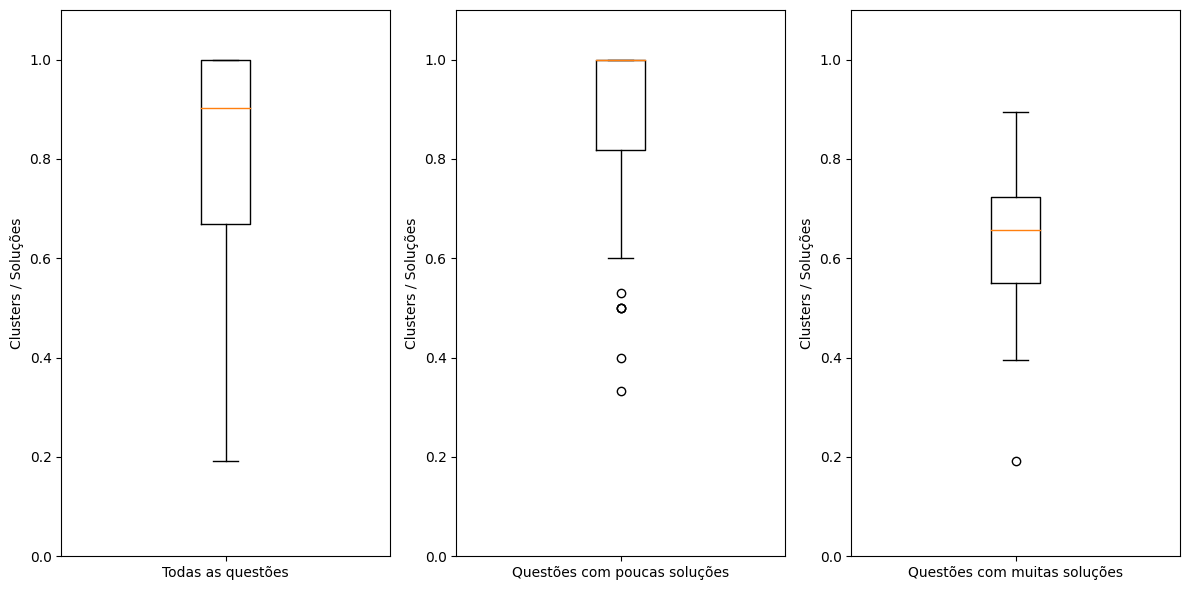

In [49]:
plot_triplets_box(metrics, 'clusters_per_solution', 'Clusters / Soluções')        

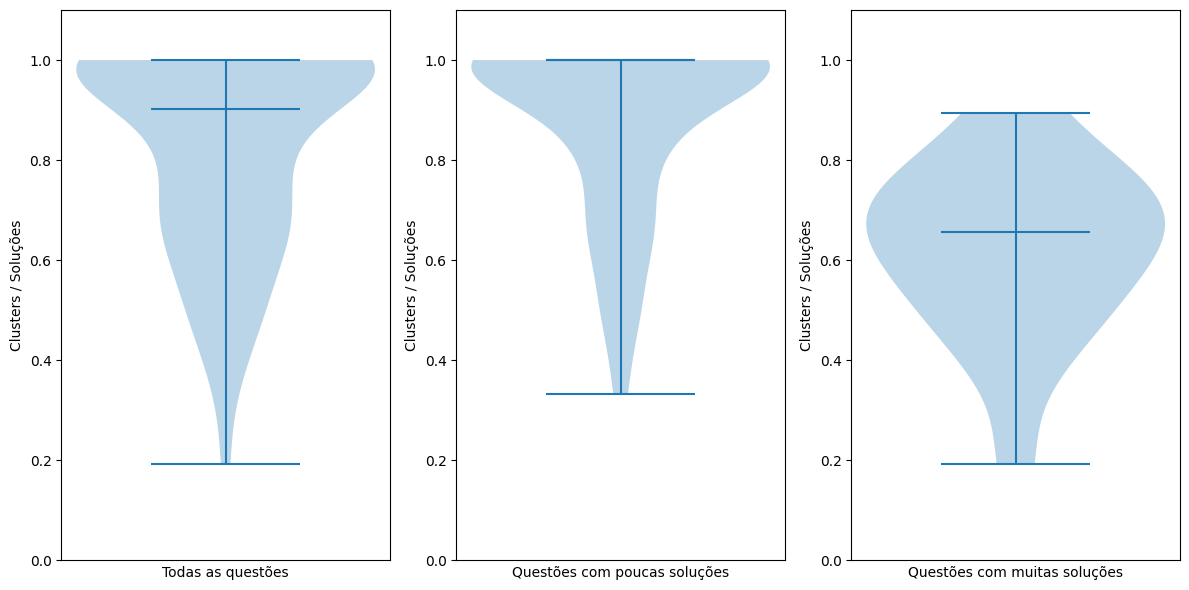

In [164]:
plot_triplets_violin(metrics, 'clusters_per_solution', 'Clusters / Soluções')